# CHURN

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.

Derived from the butter churn, the term is used in many contexts but most widely applied in business with respect to a contractual customer base. Examples include a subscriber-based service model as used by mobile telephone networks and pay TV operators. The term is often synonymous with turnover, for example participant turnover in peer-to-peer networks. Churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.[

# DATA DESCRIPTION

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Loading the Data Set

In [121]:
import pandas as pd
import numpy as np

path ='https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv'
df= pd.read_csv(path)


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.tail().T

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Details About The Columns

# Data Exploration

In [ ]:
cat_cols=df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------------------------------------------')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
--------------------------------------------------------------------------
gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df.head().T

,0,1,2,3,4
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,1,0,0,1,0
InternetService,0,0,0,0,1
OnlineSecurity,0,2,2,2,0
OnlineBackup,2,0,2,0,0


In [ ]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [2]:
df['MonthlyCharges'] = pd.cut(df['MonthlyCharges'], bins = [0, 25, 50, 100,150], labels = ['Low', 'Average', 'High','Very High'])

In [3]:
df['MonthlyCharges'].value_counts()

High         3842
Low          1406
Very High     902
Average       893
Name: MonthlyCharges, dtype: int64

The above df.info shows the "TotalCharges" columnn as an object, we'll need to convert it to numeric

In [68]:
totalCharges = df.columns.get_loc("TotalCharges")
new_col = pd.to_numeric(df.iloc[:, totalCharges], errors='coerce')
df.iloc[:, totalCharges] = pd.Series(new_col)

In [12]:
df['TotalCharges'].value_counts()

2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [13]:
df['TotalCharges'] = pd.cut(df['TotalCharges'], bins = [0, 100, 500, 1000,10000], labels = ['Low', 'Average', 'High','Very High'])

In [14]:
df['TotalCharges'].value_counts()

Very High    4150
Average      1187
High          893
Low           813
Name: TotalCharges, dtype: int64

In [20]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [120]:
df['tenure'] = pd.cut(df['tenure'], bins = [0, 25, 50, 100], labels = ['Low', 'Average', 'High'])

In [22]:
df['tenure'].value_counts()

Low          3278
High         2105
Average      1649
Very High       0
Name: tenure, dtype: int64

In [ ]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [69]:
# Dropping the irrelevant columns..

df.drop(columns=["customerID"], axis=1, inplace=True)

# Checking for the Columns containing Null , Blank Or Empty Values

In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Checking through Heat Map

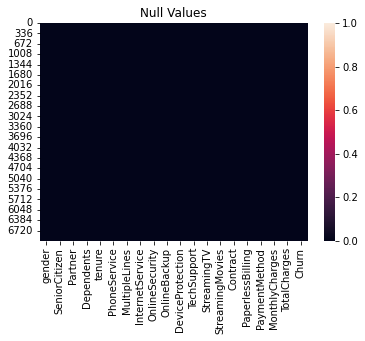

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [79]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [11]:
# Rechecking the for the removal ofg value 

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Checking and Transforming the Data types of the Columns To Same DataTypes for Better Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

In [16]:
df.describe(include=['O'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [70]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','MonthlyCharges','TotalCharges','tenure']
for val in list1:
  df[val]=le.fit_transform(df[val].astype(str))

In [18]:
df.head().T

,0,1,2,3,4
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,1,0,0,1,0
InternetService,0,0,0,0,1
OnlineSecurity,0,2,2,2,0
OnlineBackup,2,0,2,0,0


# Exploratory Data Analysis

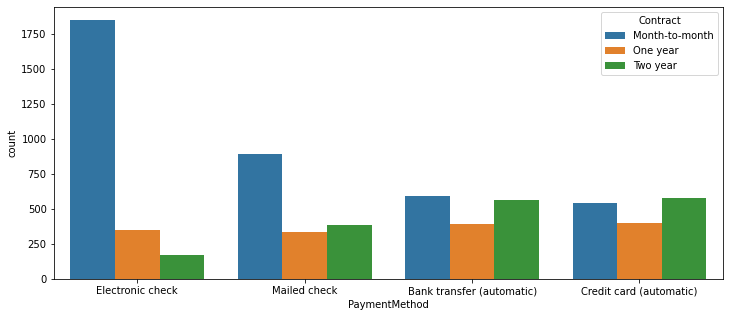

In [132]:
 fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df.PaymentMethod, hue = df.Contract, ax = ax)

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment.

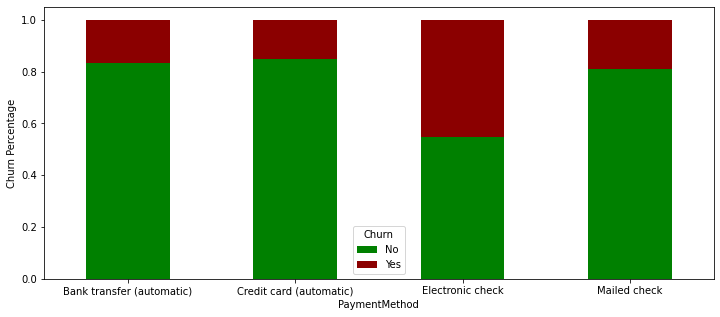

In [131]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high

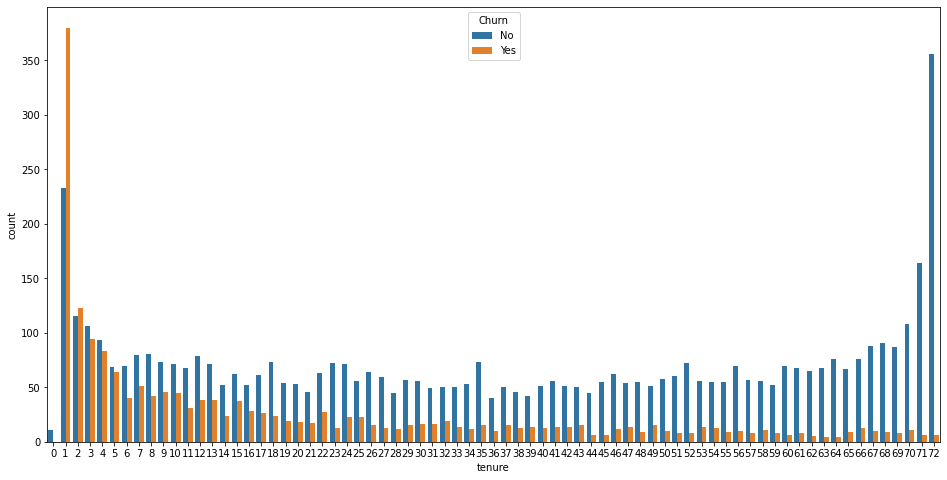

In [124]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.


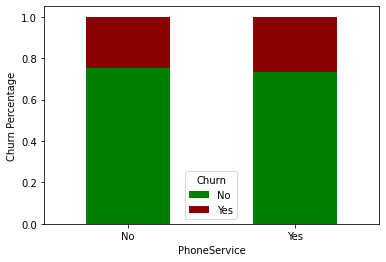

In [126]:
stacked_plot(df, "PhoneService", "Churn")

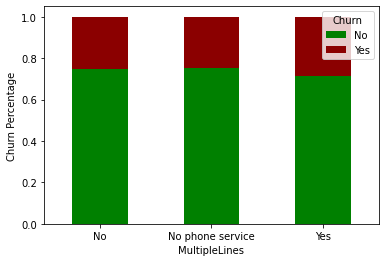

In [127]:
stacked_plot(df, "MultipleLines", "Churn")

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate

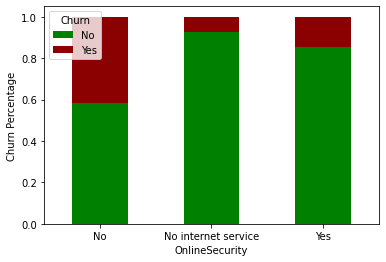

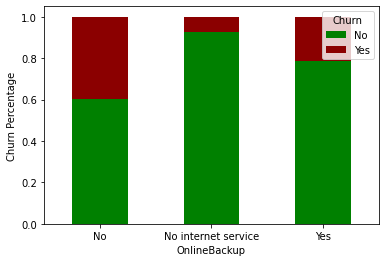

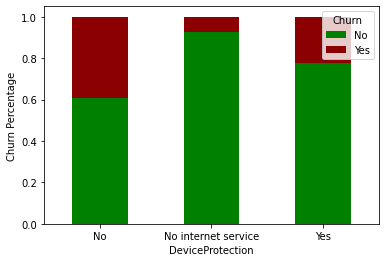

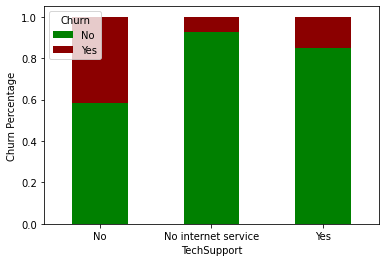

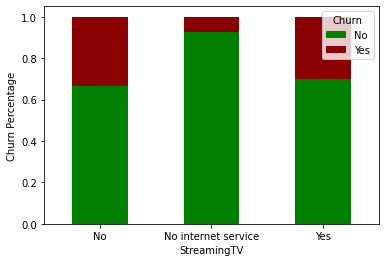

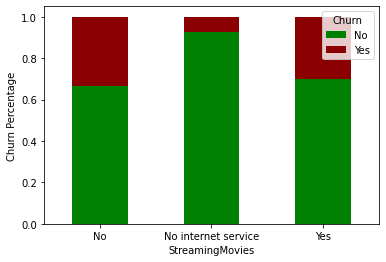

In [128]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

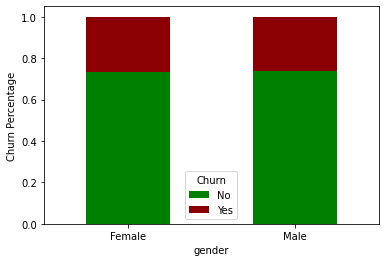

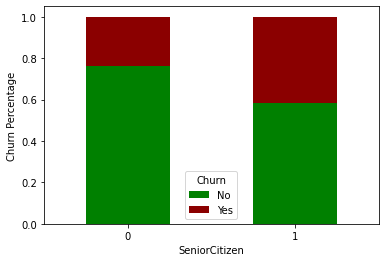

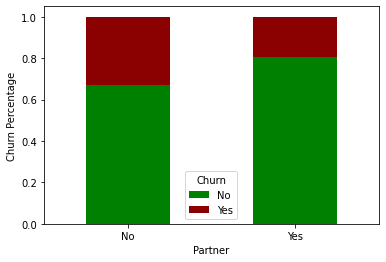

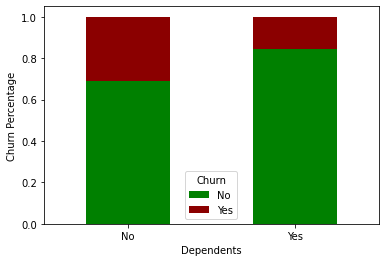

In [123]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")


* Observations 

 * Gender alone does not help us predict the customer churn.

 * If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or another factors.
 
 * Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

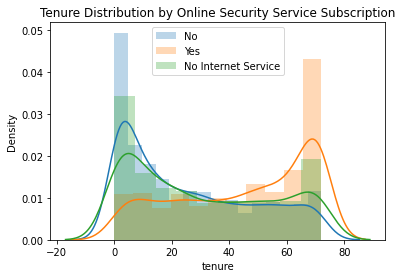

In [129]:
sns.distplot(df.tenure[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

This is not a normal distribution, and with two peaks, which means there are likely two different kinds of groups of people, and either of them love particular services.

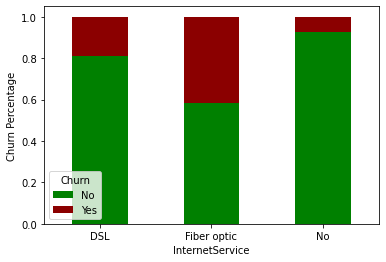

In [135]:
stacked_plot(df, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

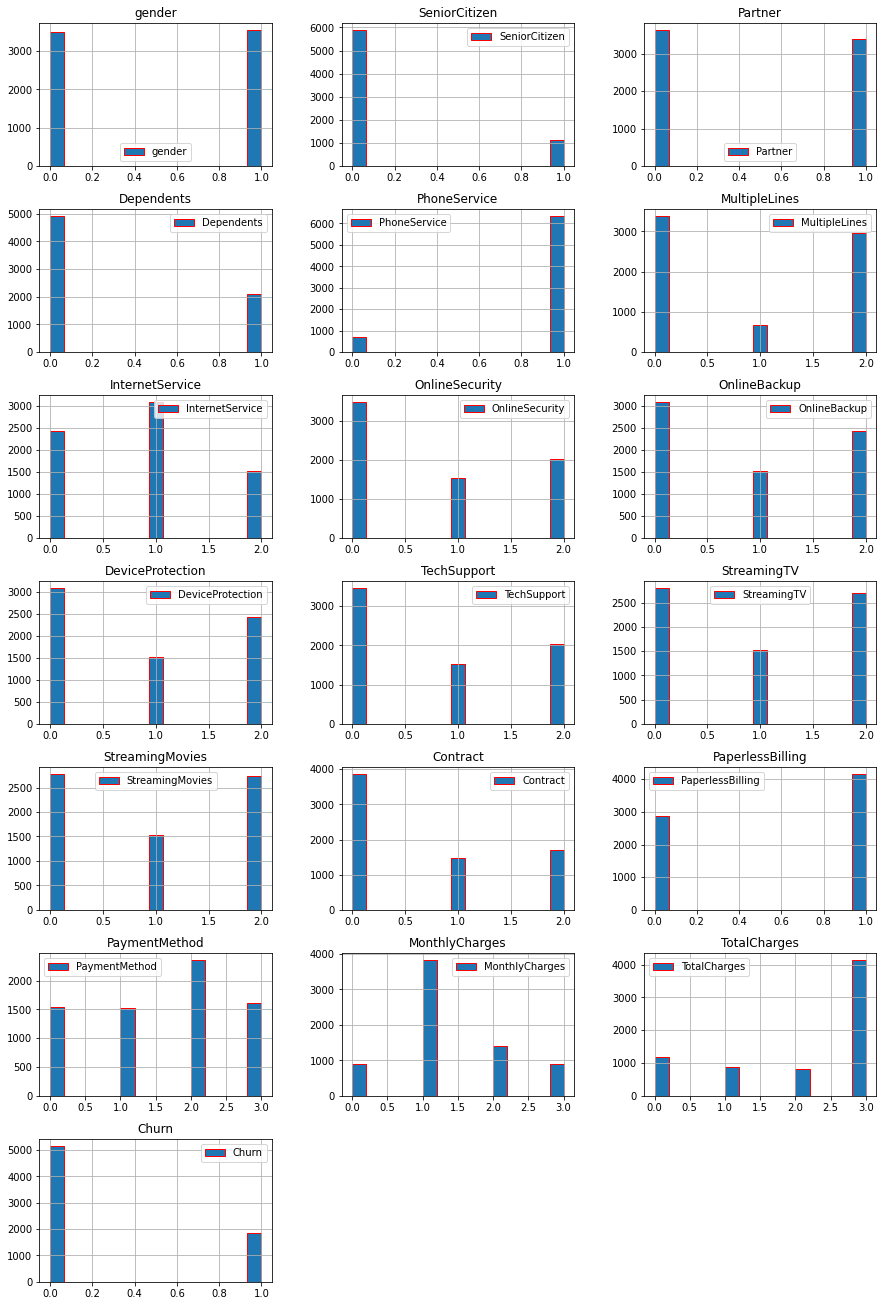

In [24]:
df.hist(figsize=(15,30),edgecolor='red',layout=(9,3),bins=15,legend=True)
plt.show()

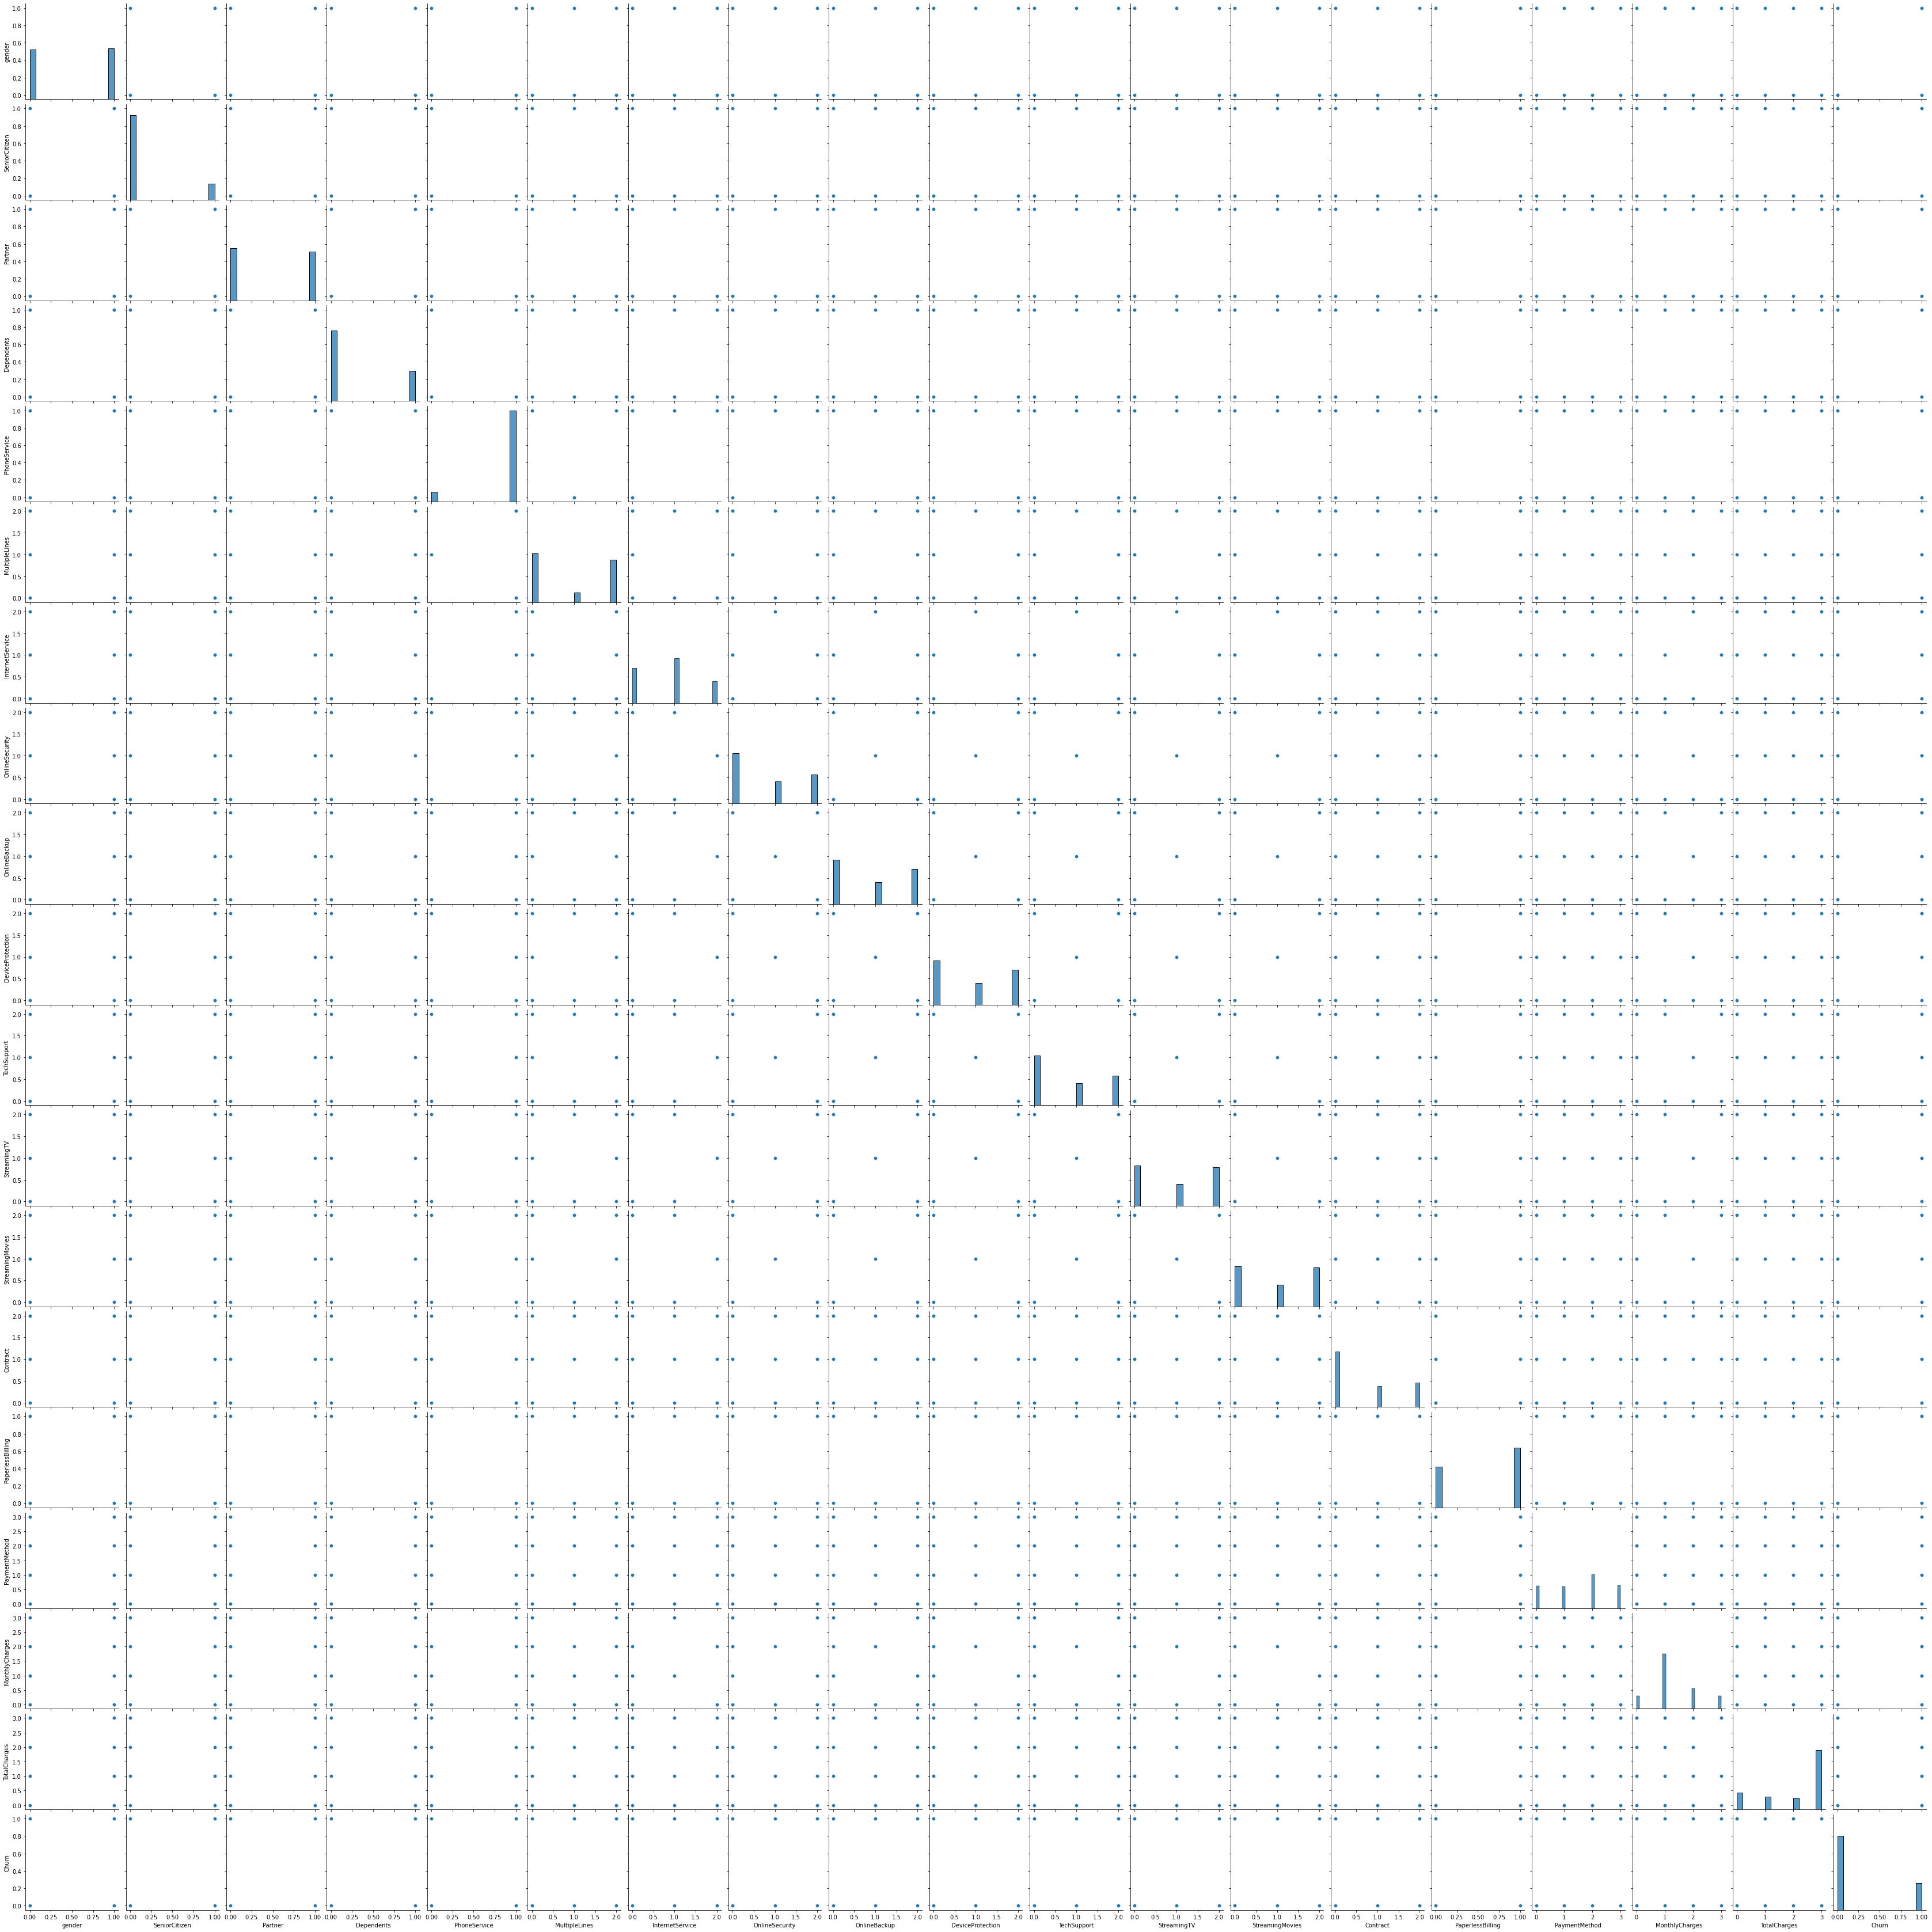

In [25]:
sns.pairplot(df)

# Corealtion between features and target ' CHURN ' ( EDA )

In [36]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005156,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.009477,0.015333,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,-0.030896,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.013209,0.084387,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,-0.216066,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.097344,0.229630,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,-0.093600,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,0.038026,0.046126,-0.164221
tenure,0.005156,-0.030896,-0.216066,-0.093600,1.000000,0.007661,-0.205923,0.025479,-0.163818,-0.205674,-0.217869,-0.175694,-0.169216,-0.173916,-0.335435,-0.000986,0.228026,-0.135730,-0.520910,0.234727
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.007661,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.356914,0.028464,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,-0.205923,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.092801,0.321455,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,0.025479,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,0.493021,-0.174962,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,-0.163818,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,0.132849,0.156132,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,-0.205674,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.247236,0.220396,-0.195525


In [37]:
# Coorelation with the Target Column Primary Fuel 

df.corr()['Churn'].sort_values()

Contract           -0.396713
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
TotalCharges       -0.129555
MonthlyCharges     -0.081218
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
tenure              0.234727
Churn               1.000000
Name: Churn, dtype: float64

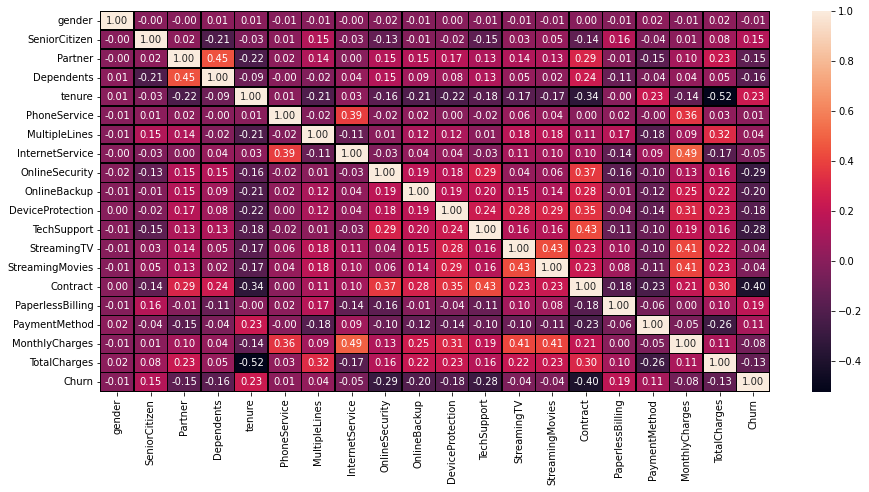

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

# Descriptive Statistics

In [39]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,1.234417,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,1.328979,2.125373,0.265370
std,0.500013,0.368612,0.499748,0.458110,0.806814,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.854741,1.172455,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,3.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000


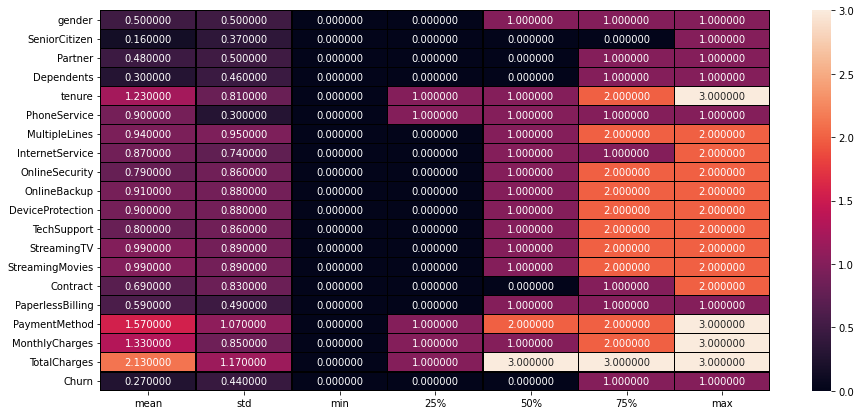

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


# Checking Data To Remove Skewness

In [71]:
df.iloc[:,:-1].skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.961642
dtype: float64

In [72]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [80]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)

In [74]:
df.iloc[:,:-1].skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144643
dtype: float64

# Outliers Checking

gender                 AxesSubplot(0.125,0.657941;0.0731132x0.222059)
SeniorCitizen       AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
Partner             AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Dependents          AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
tenure              AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
PhoneService        AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
MultipleLines       AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
InternetService     AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
OnlineSecurity      AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
OnlineBackup           AxesSubplot(0.125,0.391471;0.0731132x0.222059)
DeviceProtection    AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
TechSupport         AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
StreamingTV         AxesSubplot(0.388208,0.391471;0.0731132x0.222059)
StreamingMovies     AxesSubplot(0.475943,0.391471;0.0731132x0.222059)
Contract            

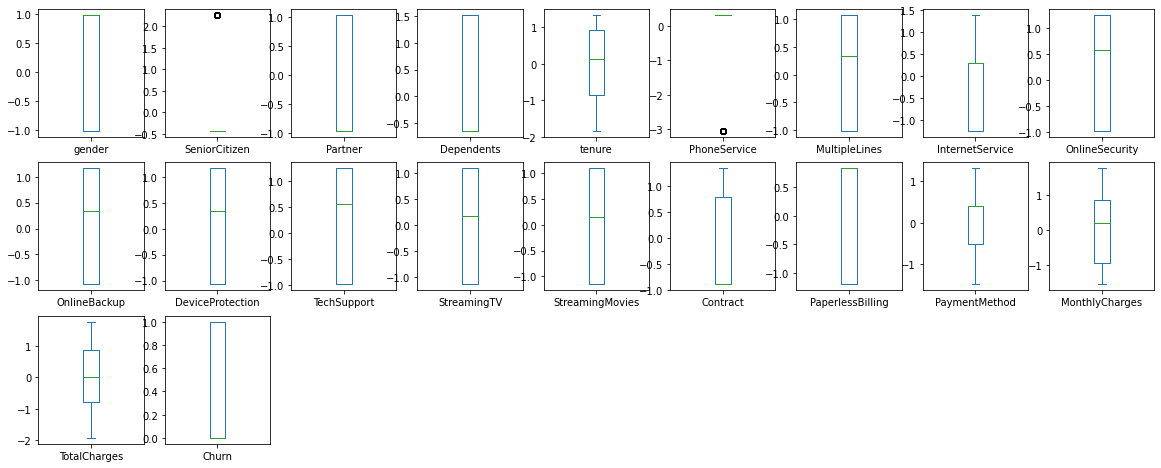

In [60]:
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(3,9), figsize=[20,8])

# IQR Proximity Rule
Z - Score Technique

In [81]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(7043, 20)

In [82]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [63]:
len(np.where(z>3)[0])

682

In [64]:
df.drop([0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1694, 1703, 1722, 1734,
       1789, 1802, 1803, 1819, 1827, 1832, 1845, 1851, 1854, 1862, 1881,
       1889, 1892, 1894, 1906, 1910, 1944, 1959, 1969, 1985, 1989, 1998,
       2002, 2031, 2046, 2050, 2087, 2089, 2090, 2117, 2124, 2127, 2131,
       2188, 2215, 2225, 2226, 2237, 2239, 2290, 2295, 2310, 2340, 2344,
       2348, 2362, 2382, 2383, 2385, 2398, 2399, 2409, 2412, 2413, 2417,
       2420, 2421, 2426, 2427, 2431, 2433, 2465, 2468, 2492, 2533, 2538,
       2541, 2547, 2562, 2608, 2610, 2626, 2637, 2644, 2661, 2662, 2681,
       2696, 2700, 2709, 2712, 2718, 2725, 2728, 2748, 2751, 2752, 2754,
       2761, 2773, 2781, 2804, 2809, 2814, 2841, 2842, 2889, 2898, 2899,
       2903, 2913, 2915, 2916, 2918, 2919, 2929, 2940, 2944, 2962, 2966,
       2972, 2990, 2992, 2994, 2995, 3020, 3028, 3036, 3039, 3042, 3043,
       3060, 3062, 3070, 3073, 3080, 3092, 3096, 3126, 3127, 3133, 3139,
       3150, 3160, 3174, 3177, 3183, 3185, 3190, 3191, 3194, 3213, 3221,
       3223, 3233, 3235, 3243, 3258, 3290, 3292, 3311, 3316, 3318, 3342,
       3354, 3363, 3370, 3414, 3422, 3444, 3454, 3492, 3502, 3505, 3541,
       3542, 3557, 3575, 3583, 3586, 3594, 3613, 3614, 3617, 3620, 3621,
       3652, 3653, 3660, 3677, 3680, 3685, 3690, 3722, 3733, 3738, 3753,
       3756, 3773, 3819, 3860, 3870, 3873, 3877, 3902, 3905, 3926, 3934,
       3940, 3945, 3946, 3955, 3961, 3973, 3976, 3983, 3989, 4008, 4020,
       4024, 4027, 4029, 4040, 4041, 4043, 4048, 4052, 4054, 4055, 4056,
       4071, 4075, 4085, 4099, 4109, 4128, 4130, 4132, 4141, 4149, 4151,
       4162, 4168, 4174, 4178, 4180, 4183, 4200, 4207, 4208, 4233, 4239,
       4251, 4281, 4290, 4309, 4310, 4311, 4338, 4369, 4396, 4400, 4402,
       4409, 4411, 4424, 4432, 4465, 4474, 4481, 4521, 4537, 4557, 4565,
       4603, 4612, 4641, 4653, 4657, 4665, 4670, 4702, 4710, 4726, 4728,
       4729, 4740, 4750, 4765, 4773, 4821, 4828, 4831, 4840, 4845, 4849,
       4854, 4857, 4860, 4882, 4883, 4897, 4898, 4915, 4919, 4924, 4933,
       4949, 4965, 4968, 4970, 4974, 4976, 4981, 4983, 4989, 4992, 4993,
       5002, 5013, 5014, 5017, 5034, 5060, 5062, 5064, 5066, 5073, 5085,
       5091, 5117, 5130, 5144, 5147, 5163, 5176, 5180, 5186, 5204, 5207,
       5210, 5212, 5216, 5249, 5263, 5264, 5284, 5290, 5292, 5296, 5303,
       5314, 5329, 5331, 5338, 5343, 5348, 5356, 5359, 5382, 5387, 5391,
       5392, 5411, 5456, 5489, 5497, 5501, 5505, 5531, 5536, 5546, 5559,
       5565, 5601, 5607, 5631, 5636, 5648, 5665, 5666, 5674, 5682, 5683,
       5690, 5717, 5740, 5761, 5788, 5790, 5796, 5799, 5829, 5833, 5837,
       5841, 5880, 5884, 5889, 5891, 5900, 5911, 5939, 5941, 5942, 5949,
       5950, 5954, 5961, 5967, 5976, 5983, 6001, 6006, 6007, 6020, 6030,
       6031, 6039, 6043, 6059, 6064, 6067, 6074, 6080, 6087, 6093, 6108,
       6129, 6132, 6133, 6145, 6149, 6162, 6174, 6183, 6204, 6209, 6212,
       6218, 6219, 6220, 6235, 6248, 6252, 6253, 6256, 6260, 6263, 6269,
       6285, 6296, 6310, 6319, 6326, 6331, 6367, 6377, 6383, 6392, 6406,
       6415, 6416, 6424, 6425, 6435, 6455, 6457, 6459, 6493, 6494, 6500,
       6503, 6509, 6514, 6515, 6522, 6523, 6530, 6536, 6547, 6553, 6570,
       6573, 6593, 6600, 6607, 6624, 6640, 6653, 6661, 6662, 6665, 6677,
       6679, 6683, 6684, 6691, 6693, 6703, 6727, 6747, 6750, 6752, 6757,
       6777, 6779, 6783, 6791, 6810, 6811, 6813, 6834, 6864, 6881, 6884,
       6891, 6895, 6904, 6905, 6937, 6940, 6941, 6943, 6946, 6949, 6964,
       6966, 6979, 6980, 6984, 6985, 6999, 7003, 7007, 7029, 7036, 7040],axis=0)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,0.990532,-0.439916,-0.966622,-0.654012,0.297205,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,0.254257,0
2,0.990532,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.386091,1
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.248808,1
5,-1.009559,-0.439916,-0.966622,-0.654012,-0.926287,0.327438,1.081357,0.290254,-0.977199,-1.078800,1.163539,-0.983227,1.099560,1.094066,-0.888524,0.829798,0.409685,1.147891,-0.352726,1
6,0.990532,-0.439916,-0.966622,1.529024,-0.162696,0.327438,1.081357,0.290254,-0.977199,1.161936,-1.077012,-0.983227,1.099560,-1.158239,-0.888524,0.829798,-0.522116,0.810032,0.279557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,-1.009559,-0.439916,-0.966622,-0.654012,1.342198,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,1.344386,0.829798,-1.489837,-1.464694,0.031448,0
7038,0.990532,-0.439916,1.034530,1.529024,-0.078084,0.327438,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,0.671510,0.296583,0
7039,-1.009559,-0.439916,1.034530,1.529024,1.342198,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.260981,1.565846,0
7041,0.990532,2.273159,1.034530,-0.654012,-1.265130,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,0.334312,-0.921477,1


In [65]:
df=df[(z<3).all(axis=1)]

# Feature Engineering ( Variantion Inflation Factor )


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.002867,-0.006488,-0.006121,-0.002062,-0.013357,-0.011164,0.001272,-0.005517,-0.005910,-0.008249,0.001953,-0.011754,0.017377,-0.014537,-0.002754,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.020578,0.008576,0.144571,-0.004045,-0.155913,-0.035423,-0.043255,-0.177693,0.015907,0.033016,-0.143270,0.156530,-0.036669,0.220251,0.105781,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.378976,0.017706,0.140005,0.000904,0.145086,0.151066,0.164029,0.122162,0.136847,0.129191,0.293339,-0.014877,-0.154795,0.095325,0.344517,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.163686,-0.001762,-0.024688,0.025712,0.171255,0.106562,0.096343,0.153084,0.057982,0.032033,0.241995,-0.111377,-0.041432,-0.114781,0.087047,-0.164221
tenure,0.002867,0.020578,0.378976,0.163686,1.000000,0.007399,0.340422,-0.025303,0.297061,0.350931,0.355578,0.296836,0.285541,0.293212,0.648743,0.008525,-0.370213,0.244338,0.901107,-0.369980
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.007399,1.000000,-0.109556,0.410139,0.016175,0.044483,0.024560,0.011715,0.069031,0.057005,0.001453,0.016505,-0.004245,0.243642,0.084649,0.011942
MultipleLines,-0.006121,0.144571,0.140005,-0.024688,0.340422,-0.109556,1.000000,-0.111541,-0.043129,0.078408,0.084768,-0.037602,0.145298,0.153297,0.101741,0.162715,-0.173447,0.407779,0.448844,0.036751
InternetService,-0.002062,-0.004045,0.000904,0.025712,-0.025303,0.410139,-0.111541,1.000000,0.078259,0.119145,0.129534,0.078901,0.179577,0.167489,0.061362,-0.100288,0.074012,-0.242609,-0.168571,-0.013011
OnlineSecurity,-0.013357,-0.155913,0.145086,0.171255,0.297061,0.016175,-0.043129,0.078259,1.000000,0.221668,0.213459,0.338119,0.068704,0.077709,0.404034,-0.208908,-0.072401,-0.191563,0.164721,-0.318821
OnlineBackup,-0.011164,-0.035423,0.151066,0.106562,0.350931,0.044483,0.078408,0.119145,0.221668,1.000000,0.210538,0.230966,0.159753,0.148430,0.310476,-0.051798,-0.108604,0.021556,0.293408,-0.220207


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

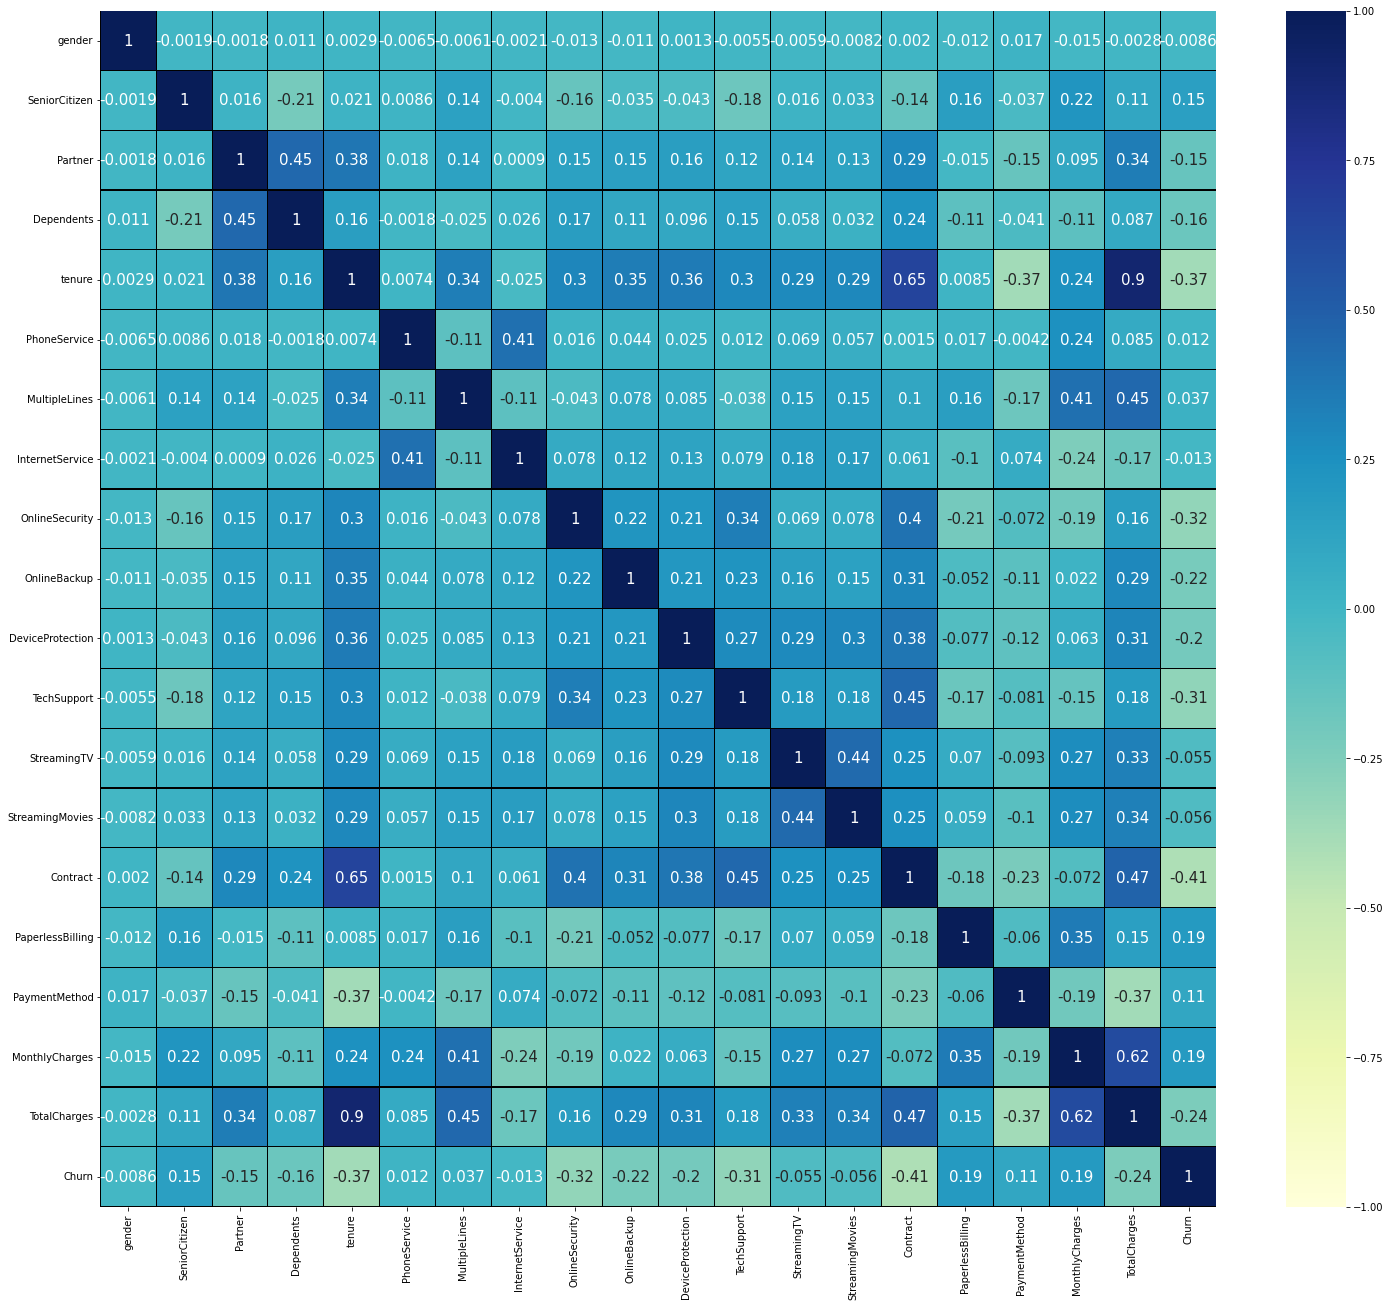

In [77]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [84]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [87]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.529796,-3.054010,0.351192,-1.225905,-0.984797,1.167485,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,0.346699,-1.139936,-1.731307
1,0.990532,-0.439916,-0.966622,-0.654012,0.213065,0.327438,-1.016190,-1.225905,1.225942,-1.076194,1.168583,-0.990499,-1.135999,-1.141330,0.898867,-1.205113,1.397213,-0.342505,0.213964
2,0.990532,-0.439916,-0.966622,-0.654012,-1.412805,0.327438,-1.016190,-1.225905,1.225942,1.167485,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,1.397213,-0.439125,-1.353167
3,0.990532,-0.439916,-0.966622,-0.654012,0.602740,-3.054010,0.351192,-1.225905,1.225942,-1.076194,1.168583,1.222655,-1.135999,-1.141330,0.898867,-1.205113,-1.416100,-0.784958,0.192288
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.412805,0.327438,-1.016190,0.242332,-0.984797,-1.076194,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,0.346699,0.113634,-1.229006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.175540,0.327438,1.078886,-1.225905,1.225942,-1.076194,1.168583,1.222655,1.120765,1.116275,0.898867,0.829798,1.397213,0.628360,0.257713
7039,-1.009559,-0.439916,1.034530,1.529024,1.443923,0.327438,1.078886,0.242332,-0.984797,1.167485,1.168583,-0.990499,1.120765,1.116275,0.898867,0.829798,-0.581993,1.354348,1.635664
7040,-1.009559,-0.439916,1.034530,1.529024,-0.774037,-3.054010,0.351192,-1.225905,1.225942,-1.076194,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,0.346699,-1.146932,-0.870541
7041,0.990532,2.273159,1.034530,-0.654012,-1.228127,0.327438,1.078886,0.242332,-0.984797,-1.076194,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,1.397213,0.244587,-0.929047


In [88]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [89]:
def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

In [90]:
vif_calc()

    VIF Factor          features
0     1.001546            gender
1     1.149814     SeniorCitizen
2     1.460791           Partner
3     1.381496        Dependents
4    23.049792            tenure
5     1.622096      PhoneService
6     1.413007     MultipleLines
7     1.828228   InternetService
8     1.356005    OnlineSecurity
9     1.206630      OnlineBackup
10    1.309155  DeviceProtection
11    1.402515       TechSupport
12    1.448452       StreamingTV
13    1.449261   StreamingMovies
14    2.374517          Contract
15    1.202640  PaperlessBilling
16    1.189281     PaymentMethod
17    8.089219    MonthlyCharges
18   33.016427      TotalCharges


In [93]:
# Dropping the irrelevant columns..

x.drop(columns=["TotalCharges"], axis=1, inplace=True)

In [94]:
vif_calc()

    VIF Factor          features
0     1.001517            gender
1     1.149782     SeniorCitizen
2     1.460443           Partner
3     1.380541        Dependents
4     2.648229            tenure
5     1.620888      PhoneService
6     1.411518     MultipleLines
7     1.639740   InternetService
8     1.351217    OnlineSecurity
9     1.202888      OnlineBackup
10    1.304983  DeviceProtection
11    1.398385       TechSupport
12    1.448055       StreamingTV
13    1.448851   StreamingMovies
14    2.337906          Contract
15    1.202369  PaperlessBilling
16    1.187706     PaymentMethod
17    2.492492    MonthlyCharges


# Scaling the Data

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.529796,-3.054010,0.351192,-1.225905,-0.984797,1.167485,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,0.346699,-1.139936
1,0.990532,-0.439916,-0.966622,-0.654012,0.213065,0.327438,-1.016190,-1.225905,1.225942,-1.076194,1.168583,-0.990499,-1.135999,-1.141330,0.898867,-1.205113,1.397213,-0.342505
2,0.990532,-0.439916,-0.966622,-0.654012,-1.412805,0.327438,-1.016190,-1.225905,1.225942,1.167485,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,1.397213,-0.439125
3,0.990532,-0.439916,-0.966622,-0.654012,0.602740,-3.054010,0.351192,-1.225905,1.225942,-1.076194,1.168583,1.222655,-1.135999,-1.141330,0.898867,-1.205113,-1.416100,-0.784958
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.412805,0.327438,-1.016190,0.242332,-0.984797,-1.076194,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,0.346699,0.113634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.175540,0.327438,1.078886,-1.225905,1.225942,-1.076194,1.168583,1.222655,1.120765,1.116275,0.898867,0.829798,1.397213,0.628360
7039,-1.009559,-0.439916,1.034530,1.529024,1.443923,0.327438,1.078886,0.242332,-0.984797,1.167485,1.168583,-0.990499,1.120765,1.116275,0.898867,0.829798,-0.581993,1.354348
7040,-1.009559,-0.439916,1.034530,1.529024,-0.774037,-3.054010,0.351192,-1.225905,1.225942,-1.076194,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,0.346699,-1.146932
7041,0.990532,2.273159,1.034530,-0.654012,-1.228127,0.327438,1.078886,0.242332,-0.984797,-1.076194,-1.074670,-0.990499,-1.135999,-1.141330,-0.897190,0.829798,1.397213,0.244587


# MODELLING FOR CHURN
# Building CLASSIFICATION Model As Target Column's Has only Two Outputs

0    5174
1    1869
Name: Churn, dtype: int64


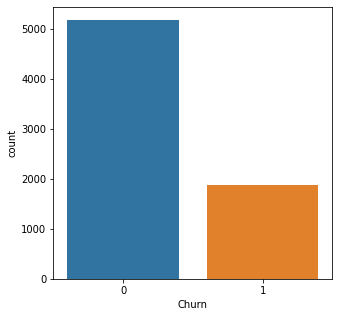

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())  
plt.figure(figsize=(5,5))
sns.countplot(df['Churn'])
plt.show()

# OverSampling


In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Modelling
# Getting the best random state

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu*100," on Random_state ",maxRS) 

Best accuracy is  86.79549114331722  on Random_state  71


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Logistic Regression

In [100]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)

#Prediction
predlog = log.predict(x_test)

print(accuracy_score(y_test, predlog)*100)
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

78.22866344605475
[[1201  361]
 [ 315 1228]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1562
           1       0.77      0.80      0.78      1543

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



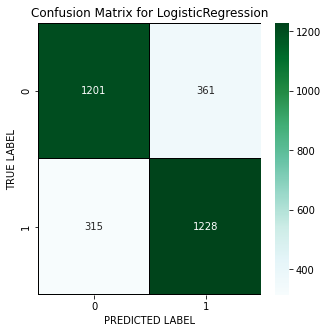

In [101]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_test,predlog)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Random Forest Classifier

In [102]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

86.60225442834138
[[1345  217]
 [ 199 1344]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1562
           1       0.86      0.87      0.87      1543

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



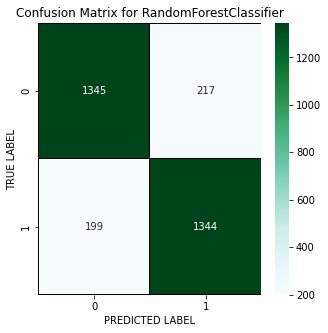

In [103]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


# Decission Tree Classifier


In [104]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

#Prediction
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc)*100)
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

79.58132045088567
[[1238  324]
 [ 310 1233]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1562
           1       0.79      0.80      0.80      1543

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



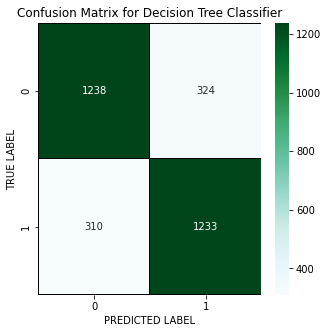

In [105]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Support Vector Machine Classifier

In [106]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc)*100)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

81.86795491143317
[[1227  335]
 [ 228 1315]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1562
           1       0.80      0.85      0.82      1543

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



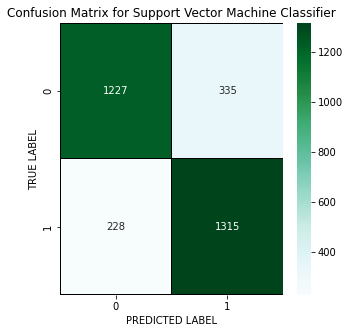

In [107]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier

In [108]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB)*100)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

85.5072463768116
[[1293  269]
 [ 181 1362]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1562
           1       0.84      0.88      0.86      1543

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.85      3105



Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

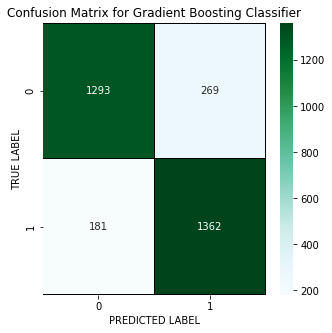

In [109]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')

# Cross Validation Score

In [110]:
#cv score for Logistic Regression
print(cross_val_score(log,x,y,cv=5).mean()*100)

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean()*100)

# cv score for Random Forest Classifier
print(cross_val_score(rf,x,y,cv=5).mean()*100)

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean()*100)

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean()*100)

77.937975590906
78.03532710847733
85.66001452310739
80.64404610969848
83.18612693009062


It is clear from the above that Random Forest Classifier is working the best with respect to Cross validation score as well which is minimum in the case..

So we move forward with Random Forest Classifier Model

# HyperParameter Tuning for the model with best score

In [111]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [112]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [113]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [114]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [115]:
Churne =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
Churne.fit(x_train, y_train)
pred = Churne.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.63929146537842


# Plotting ROC and compare AUC for the final model

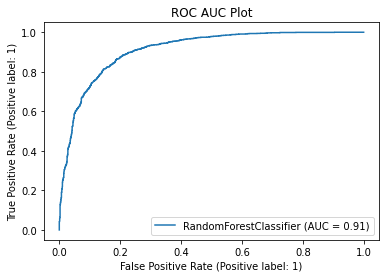

In [117]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Churne,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Saving the model

In [118]:
import joblib
joblib.dump(Churne,"Census_Income.pkl")

['Census_Income.pkl']

# Conclusion:
# The accuracy score for Income is 91 %